In [6]:
import glob
from os.path import join as pj

waveforms_path = '/data/seismic_toolbox/waveforms'
station_path = glob.glob(pj(waveforms_path, '*'))[3]

In [7]:
noise = glob.glob(pj(station_path, 'noise/*'))
local = glob.glob(pj(station_path, 'local/*'))

In [8]:
from obspy import read

wave_quake = read(local[0])
wave_noise = read(noise[25]) 

def filter_wave(wave):
    return wave.filter('bandpass', freqmin=1, freqmax=30).slice(starttime=wave[0].stats.starttime+5)

wave_quake = filter_wave(wave_quake)
wave_noise = filter_wave(wave_noise)

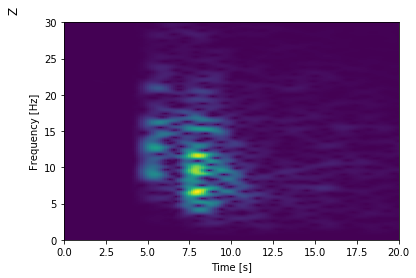

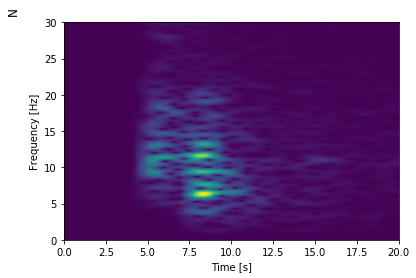

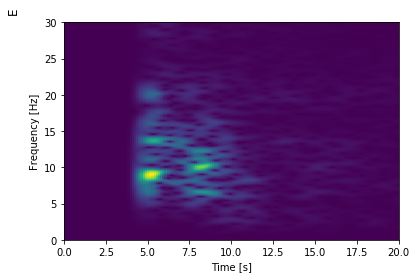

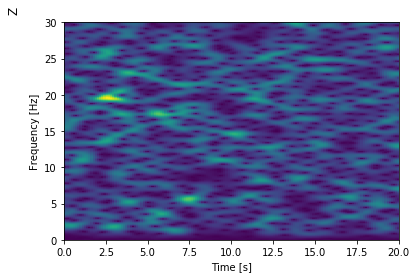

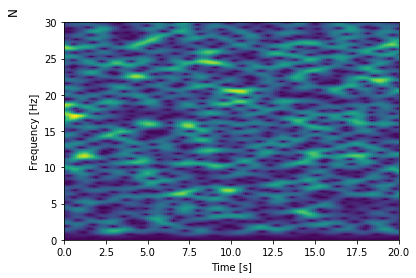

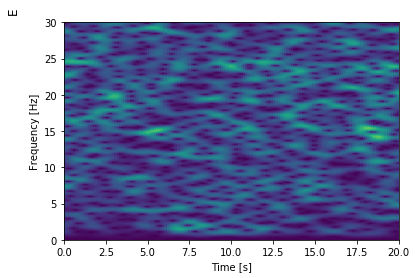

In [53]:
from matplotlib import pyplot as plt
from matplotlib.ticker import NullLocator

import numpy as np

def get_slice(wave):
    start = wave[0].stats.starttime + 5
    return wave.slice(starttime=start)

def show_spectrogram(stream, axis_off=False, title_off=False):
    figure_list = stream.spectrogram(show=False, title="", per_lap=.95)

    for figure, name in zip(figure_list, ['Z', 'N', 'E']):
        axes = figure.gca()
        offset = 2.5
        
        labels = np.arange(0, 21, 2.5)
        axes.set_xticklabels(labels)
        plt.plot()
        
        axes.set_xlim([2.5, 22.5])
        axes.set_ylim([0, 30])
        axes.set_title("" if title_off else name, rotation='vertical',x=-0.15, y=0.47)
        
        if axis_off:
            # Get Rid of Whitespace
            axes.axis("off")
            axes.xaxis.set_major_locator(NullLocator())
            axes.yaxis.set_major_locator(NullLocator())
    
    


    plt.show()
    

    
# q = get_slice(wave_quake)
# q.spectrogram()

show_spectrogram(wave_quake)
show_spectrogram(wave_noise)

In [ ]:
show_spectrogram(wave_quake, axis_off=True, title_off=True)

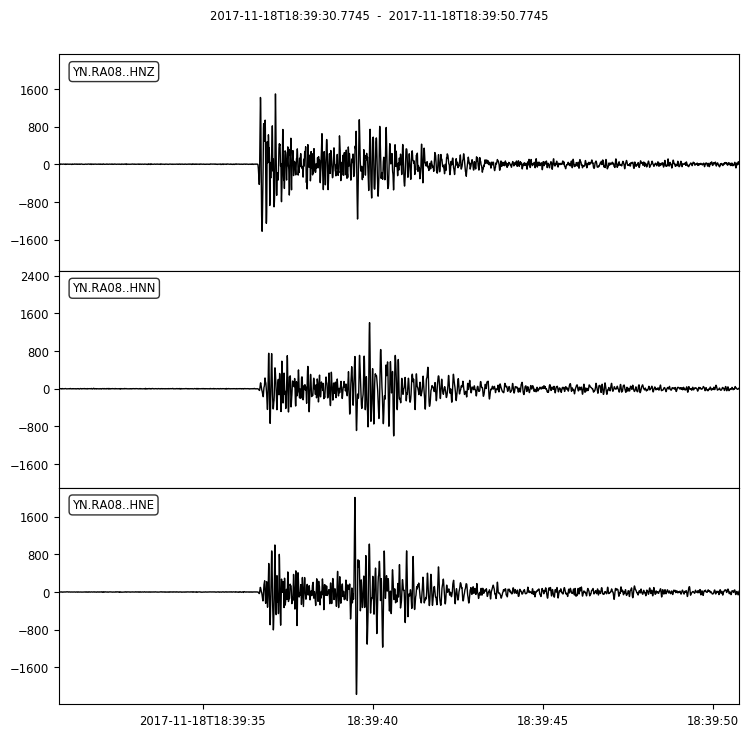

In [207]:
def show_waves(stream, axis_off=False):
    wave = wave_quake.slice(starttime=start, endtime=start + 20)
    wave.plot()
    
show_waves(wave_quake)

AttributeError: 'Colorbar' object has no attribute 'yticks'

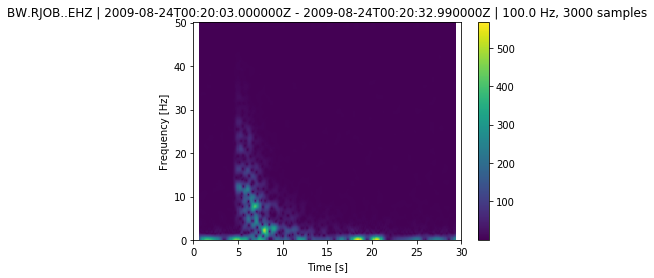

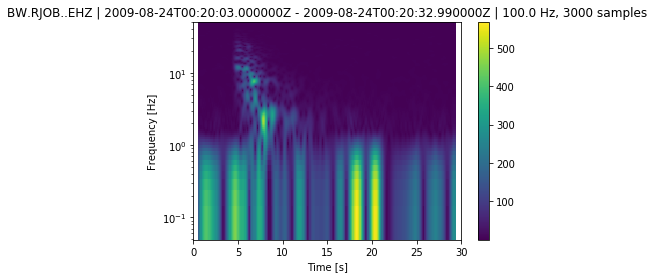

In [67]:
import matplotlib.pyplot as plt 
from obspy import read

tr = read()[0]

fig = tr.spectrogram(show=False)
ax = fig.axes[0]
mappable = ax.images[0]
plt.colorbar(mappable=mappable, ax=ax)

fig = tr.spectrogram(show=False, log=True)
ax = fig.axes[0]
mappable = ax.collections[0]

bar = plt.colorbar(mappable=mappable, ax=ax)
print(bar.yticks())

plt.show()